Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL7514 / EEL7513 / EEL410250 - Aprendizado de Máquina
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\calS}{\mathcal{S}}$

# Exercício 7: Redes Profundas

Neste exercício você irá construir modelos de redes neurais para realizar classificação e experimentar diversas configurações de hiperparâmetros.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact
from sklearn.neural_network import MLPClassifier

import sys
import tensorflow as tf
print('Python version:', sys.version.split(' ')[0])
print('TensorFlow version:', tf.__version__)
print('GPU:', tf.config.list_physical_devices('GPU'))

Python version: 3.6.9
TensorFlow version: 2.3.0
GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# 1. Conjunto de dados #1

Para "aquecer", vamos começar utilizando o conjunto XOR do exercício anterior.

In [12]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X_train, y_train = make_blobs(n_samples=400, n_features=2, centers=[[0,0],[1,1],[0,1],[1,0]], cluster_std=0.15, random_state=0)
y_train = (y_train >= 2).astype(int)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/4, random_state=0)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(300, 2) (300,)
(100, 2) (100,)


1. Usando a biblioteca sklearn, treine uma rede neural de 2 camadas (1 oculta) para classificação. Utilize o otimizador Adam com parâmetros padrão, exceto pela taxa de aprendizado (constante), que deve ser escolhida apropriadamente. Obtenha 100% de acurácia de treinamento e de validação e calcule o valor da perda ao final do treinamento. Além disso, trace a curva da perda de treinamento ao longo das épocas.

#### Dicas
- Para obter a curva de perda no treinamento, você pode utilizar `model.loss_curve_`.
- Note que o sklearn usa uma terminologia por vezes inconsistente com a literatura da área (mas consistente internamente em sua API). Por exemplo, o parâmetro `max_iter` corresponde ao número de épocas, não necessariamente ao número de atualizações de pesos. Outro aspecto incômodo é juntar todos os hiperparâmetros do treinamento dentro da definição do modelo, o que além de tornar a chamada extensa, faz com que, dependendo da configuração, alguns parâmetros se tornem desnecessários ou mudem de definição.

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss

Train accuracy: 100.0%
  Val accuracy: 100.0%
loss: 0.03654943062758895


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'Loss Curve')

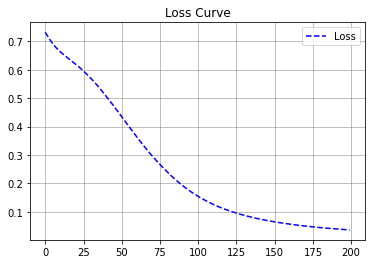

In [14]:
model = MLPClassifier(hidden_layer_sizes=[20], activation='relu', solver = 'adam', learning_rate='constant', learning_rate_init = 0.005)
model.fit(X_train,y_train)

# Calculando acuracia de treino
acc_train = model.score(X_train, y_train)*100

# Calculando acurarica de teste
acc_val = model.score(X_val,y_val)*100

# imprimindo resultados
print('Train accuracy: {}%'.format(acc_train))
print('  Val accuracy: {}%'.format(acc_val))
print('loss: {}'.format(model.loss_))

# Plot da função custo
plt.plot(model.loss_curve_,'b--')
plt.grid(axis='both', color='gray', linewidth=0.5)
plt.legend(['Loss'])
plt.title('Loss Curve')

In [15]:
X_train.shape[1]

2

2. Repita o item anterior usando [Keras](https://keras.io/), a API de alto-nível do [TensorFlow](https://www.tensorflow.org/), disponível através do módulo `tensorflow.keras`. Certifique-se de estar usando TensorFlow 2.x.


### Dicas
- Ao invés de instalar o TensorFlow e rodar localmente em sua máquina, uma opção mais simples é utilizar o serviço em nuvem gratuito [Google Colab](https://colab.research.google.com), que já possui todas as bibliotecas necessárias instaladas, inclusive o TensorFlow 2.x.

- Leia a documentação do Keras para aprender a utilizá-lo. Para quem está começando, é recomendável (e suficiente para este exercício) usar a classe [Sequential](https://keras.io/guides/sequential_model). É útil também conhecer sobre funções de [ativação](https://keras.io/activations), funções de [perda](https://keras.io/losses), métodos de [otimização](https://keras.io/api/optimizers) e o processo de [treinamento e avaliação](https://keras.io/guides/training_with_built_in_methods/) de modelos.
- No Keras, ao contrário do sklearn, é necessário especificar explicitamente a camada de saída, sua função de ativação, e a função de perda utilizada. (No sklearn, essa escolha é automática a partir dos valores encontrados em `y_train`.) 
- É recommendável utilizar o comando `model.summary()` para obter uma descrição de todas as camadas da rede neural.
- Para configurar a taxa de aprendizado, é necessário instanciar um otimizador, caso contrário será usado o valor padrão.
- Para obter a curva de perda no treinamento, utilize 
```python
history = model.fit(...)
history.history['loss']
```
- Se quiser garantir a reprodutibilidade, utilize `tf.random.set_seed()` **antes** de definir o modelo (os pesos são inicializados no momento da adição de cada camada).


In [16]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

In [17]:
model = Sequential(tf.random.set_seed(100))

# camada oculta
model.add(layers.Dense(units = 100, activation = 'relu', input_shape = ( X_train.shape[1],), name = 'Entrada')) 

# camada de saída
model.add(layers.Dense(units = 1, activation = 'sigmoid', name = 'Saida')) 

# Otimizador - Gradiente
optimizer = tf.keras.optimizers.Adam(learning_rate =0.001,)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Entrada (Dense)              (None, 100)               300       
_________________________________________________________________
Saida (Dense)                (None, 1)                 101       
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(X_train,y_train, epochs = 300)

Epoch 1/300
10/10 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.4967
Epoch 2/300
10/10 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.4433
Epoch 3/300
10/10 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.5633
Epoch 4/300
10/10 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.8167
Epoch 5/300
10/10 [==============================] - 0s 2ms/step - loss: 0.6337 - accuracy: 0.8800
Epoch 6/300
10/10 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.9267
Epoch 7/300
10/10 [==============================] - 0s 2ms/step - loss: 0.6056 - accuracy: 0.9500
Epoch 8/300
10/10 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.9700
Epoch 9/300
10/10 [==============================] - 0s 2ms/step - loss: 0.5759 - accuracy: 0.9833
Epoch 10/300
10/10 [==============================] - 0s 2ms/step - loss: 0.5606 - accuracy: 0.9933
Epoch 11/

In [20]:
# Metricas
model.metrics_names

# Calculando a Função custo e Accuracy dos dados de Treino
acc_train = model.evaluate(X_train,y_train)[1]

# Calculando a Função custo e Accuracy dos dados de Validação
acc_val = model.evaluate(X_val,y_val)[1]


4/4 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 1.0000


In [21]:
print('Train accuracy: {}%'.format(acc_train*100))
print('  Val accuracy: {}%'.format(acc_val*100))

Train accuracy: 100.0%
  Val accuracy: 100.0%


<class 'dict'>
dict_keys(['loss', 'accuracy'])


Text(0.5, 1.0, 'Loss Curve')

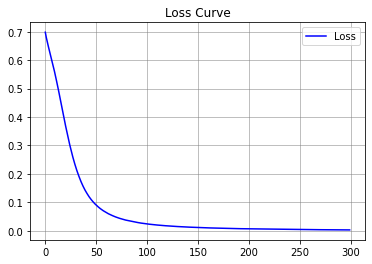

In [22]:
print(type(history.history))
print(history.history.keys())

plt.plot(history.history['loss'], color='b')
plt.grid(axis='both', color='gray', linewidth=0.5)
plt.legend(['Loss'])
plt.title('Loss Curve')

# 2. Conjunto de dados #2

A partir de agora, desenvolva seus modelos de aprendizado profundo utilizando o Keras/TensorFlow, o qual possui muito mais recursos do que o sklearn e é mais otimizado para desempenho.

O segundo conjunto de dados é o conjunto de dígitos manuscritos [MNIST](https://en.wikipedia.org/wiki/MNIST_database), o qual possui 70000 amostras, sendo 10000 amostras de teste. Este é um conjunto clássico e -- embora não seja mais recomendado para avaliação do estado da arte -- ainda vastamente utilizado para experimentação e aprendizado. O conjunto pode ser facilmente carregado pelos comandos abaixo.

In [272]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Observe a diferença na notação convencional quando usamos o Keras (ou qualquer outro *framework* de aprendizado profundo): `x` (minúsculo) ao invés de `X` (maiúsculo). Isto ocorre porque o Keras nos permite trabalhar diretamente com os dados em seu formato original, neste caso, como um tensor 3D. Portanto, não é necessário redimensionar (*reshape*) os dados antes de aplicar o modelo, assim como perde o sentido usar uma notação especial para denotar uma matriz (tensor 2D).

Caso seja necessário redimensionar os dados em algum estágio do modelo, isso pode ser feito internamente com camadas do Keras. Em particular, para redimensionar para o formato convencional de tensor 2D `(n_samples, n_features)`, pode ser usada a camada `Flatten`. Isto é sempre necessário antes de aplicar uma camada `Dense`, a qual só opera na última dimensão. No nosso caso, as duas dimensões (28,28) serão "achatadas" em uma única de (784,):

In [273]:
from tensorflow.keras.layers import Flatten
model = Sequential()
model.add(tf.keras.Input(shape=(28,28)))
model.add(Flatten())
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_36 (Flatten)         (None, 784)               0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


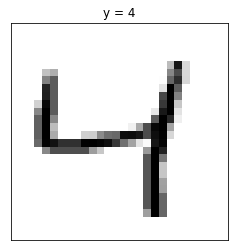

In [274]:
# Exemplo de uma imagem
i = 2
plt.imshow(x_train[i], cmap=plt.cm.gray_r);
plt.title('y = {}'.format(y_train[i]));
plt.xticks([]);
plt.yticks([]);

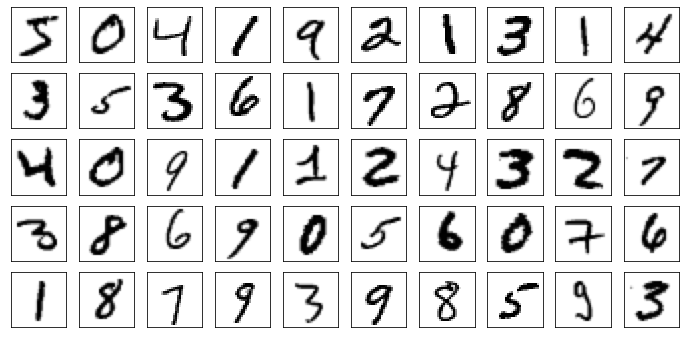

In [275]:
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.imshow(x_train[i], cmap=plt.cm.gray_r);
    plt.xticks([]);
    plt.yticks([]);

## Tarefas

1. Separe um conjunto de validação com 5000 amostras (por exemplo, as últimas 5000 amostras do conjunto de treinamento). Confirme que a distribuição das classes é parecida com a do conjunto de treinamento (não precisa ser exatamente igual).

#### Dica
- Para calcular e visualizar um histograma, você pode utilizar a função `plt.hist()`, opcionalmente definindo os parâmetros `density` e `alpha`, entre outros.

In [276]:
from sklearn.model_selection import train_test_split

In [277]:
x_train_60mil = x_train
y_train_60mil = y_train
print(x_train_60mil.shape, y_train_60mil.shape)

(60000, 28, 28) (60000,)


In [215]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=(5/60), random_state=15)

In [216]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)


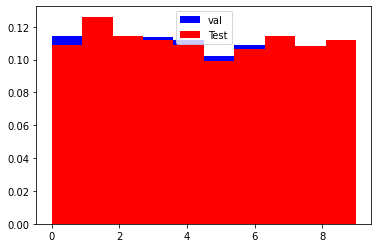

In [217]:
plt.hist(y_val, density=True, alpha=1,color='b')
plt.hist(y_test, density=True,alpha=1, color='r')
plt.legend(['val','Test'])

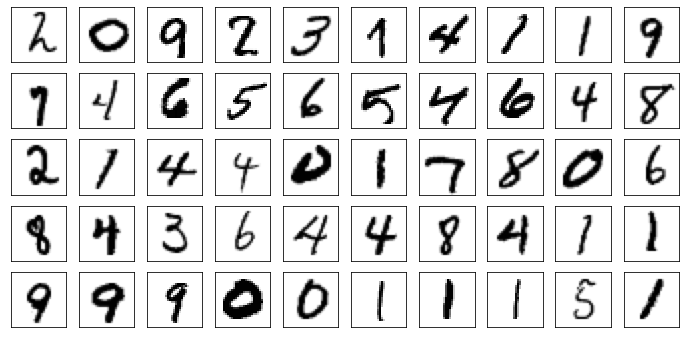

In [218]:
#Conjunto de Treinamento
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.imshow(x_train[i], cmap=plt.cm.gray_r);
    plt.xticks([]);
    plt.yticks([]);

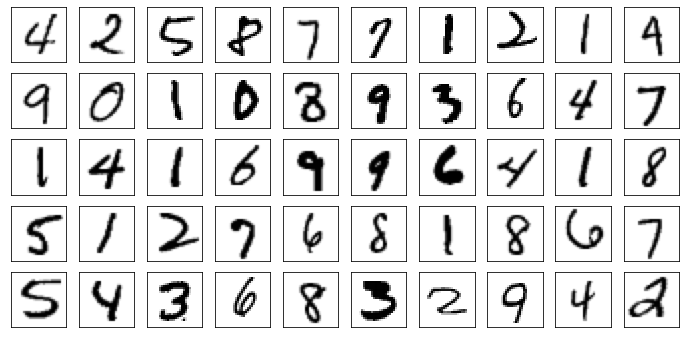

In [219]:
#Conjunto de Validação
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.imshow(x_val[i], cmap=plt.cm.gray_r);
    plt.xticks([]);
    plt.yticks([]);

2. Para desenvolvimento do modelo, considere um subconjunto de treinamento com poucas amostras, por exemplo, as primeiras 10000, e também um número pequeno de épocas, por exemplo, 10. Isso vai permitir uma rápida experimentação. Uma vez finalizado o desenvolvimento, você poderá aumentar esses valores. Inicialmente, construa um modelo **baseline** sem nenhuma camada oculta, treine-o e confirme que está funcionando corretamente.
1. Por hora, ignore o conjunto de validação. Tente obter 100% de acurácia de treinamento (com o conjunto reduzido) e apenas 10 épocas. O objetivo é garantir que o modelo possui capacidade suficiente para este problema. Fique à vontade para variar quaisquer hiperparâmetros do modelo ou do treinamento, mas utilize apenas conceitos já abordados na disciplina (i.e., não utilize camadas convolucionais). Tenha em mente as seguintes observações:
 - A taxa de aprendizado é provavelmente o hiperparâmetro mais importante, no sentido de que, mesmo que você consiga supostamente encontrar os melhores valores de todos os demais hiperparâmetros (inclusive da arquitetura do modelo), ainda assim o modelo poderá ter um desempenho ruim se a taxa de aprendizado não for ajustada adequadamente.
 - Em geral, cada modificação em algum hiperparâmetro pode exigir um novo ajuste da taxa de aprendizado (i.e., o seu valor ótimo pode mudar), embora alguns hiperparâmetros tenham um impacto maior do que outros.
 - O batch size tem um impacto grande na velocidade do treinamento, além de impactar no desempenho do modelo. De maneira geral, aumentar o batch size reduz o tempo de treinamento de uma época (por quê?), mas pode piorar o desempenho para um número fixo de épocas (por quê?). Assim, uma recomendação básica é utilizar o maior batch size possível tal que o desempenho do modelo (para um número fixo de épocas) não apresente degradação significativa. Minimizar o tempo de treinamento é essencial para uma rápida experimentação.
 - Naturalmente, o desempenho ótimo para cada valor de batch size envolve um ajuste da taxa de aprendizado. Uma regra prática (empírica) é: se o batch size é multiplicado por um fator F, então, para obter um desempenho semelhante, a taxa de aprendizado também deve ser multiplicada por F. Note que essa regra não é exata, mas serve como um bom ponto de partida.
1. Relate suas principais observações sobre quais abordagens foram bem sucedidas ou não.

#### Dicas
- Para um problema multi-classe com codificação compacta $y \in \{0,1,\ldots,9\}$ (i.e., que **não** é *one-hot encoding*), a função perda adequada é a `'sparse_categorical_crossentropy'`. Nesse caso não é necessário codificar como *one-hot*.
- O Keras permite monitorar, durante o treinamento, não apenas a perda, mas também outras métricas, como a acurácia, tanto de treinamento quanto de validação. Para isso, configure o parâmetro `metrics` ao executar `model.compile`. As curvas estarão disponíveis no parâmetro history.
- Para avaliar o efeito de um hiperparâmetro, é muito útil garantir que não há outras fontes de "ruído" ou variação, assim cada hiperparâmetro pode ser avaliado isoladamente. Em particular, a inicialização dos pesos do modelo deve ser determinística. Para isso, utilize `tf.random.set_seed()` antes de definir o modelo. Isso também garante a reprodutibilidade dos resultados, caso você precise executar o treinamento novamente.
- Para medir o tempo de execução de uma célula do notebook, utilize `%%time` na primeira linha da célula.
- É usual (e tipicamente suficiente) variar o batch size em potências de 2.
- Se desejar utilizar a GPU do Colab para acelerar o treinamento, selecione-a no menu *Runtime/Change runtime type*. Para os modelos deste exercício, porém, o ganho computacional provavelmente não será tão expressivo. Note também que é possível que a inicialização de pesos seja diferente de quando o modelo é executado sem GPU, ainda que a mesma *random seed* tenha sido definida.

In [220]:
model = Sequential(tf.random.set_seed(100))
model.add(tf.keras.Input(shape=(28,28)))
model.add(Flatten())
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_24 (Flatten)         (None, 784)               0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [221]:
# camada de saída
model.add(layers.Dense(units = 10, activation = 'softmax', name = 'Saida')) 
model.summary()
# Otimizador - Gradiente
optimizer = tf.keras.optimizers.Adam(learning_rate =0.01,)
model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_24 (Flatten)         (None, 784)               0         
_________________________________________________________________
Saida (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [222]:
x_train_dezmil = x_train[:10000]
y_train_dezmil = y_train[:10000]
print(x_train_dezmil.shape, y_train_dezmil.shape)

(10000, 28, 28) (10000,)


In [223]:
history = model.fit(x_train_dezmil, y_train_dezmil, epochs = 10, batch_size=128)

Epoch 1/10
79/79 [==============================] - 0s 2ms/step - loss: 0.5441 - accuracy: 0.8422
Epoch 2/10
79/79 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.9106
Epoch 3/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2705 - accuracy: 0.9223
Epoch 4/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2552 - accuracy: 0.9267
Epoch 5/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2327 - accuracy: 0.9322
Epoch 6/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2210 - accuracy: 0.9377
Epoch 7/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2134 - accuracy: 0.9389
Epoch 8/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.9400
Epoch 9/10
79/79 [==============================] - 0s 2ms/step - loss: 0.1984 - accuracy: 0.9440
Epoch 10/10
79/79 [==============================] - 0s 2ms/step - loss: 0.1891 - accuracy: 0.9469


<class 'dict'>
dict_keys(['loss', 'accuracy'])


Text(0.5, 1.0, 'Loss Curve')

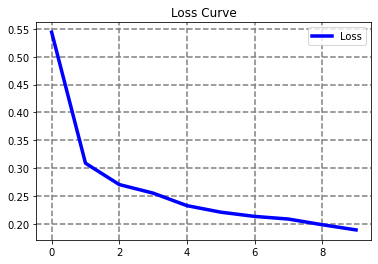

In [225]:
print(type(history.history))
print(history.history.keys())

plt.plot(history.history['loss'], color='b', linewidth=3.5)
plt.grid(axis='both', color='gray', linewidth=1.5, linestyle='--')
plt.legend(['Loss'])
plt.title('Loss Curve')

In [226]:
%%time
# 2.3
tf.random.set_seed(100)
model = Sequential()
model.add(tf.keras.Input(shape=(28,28)))
model.add(Flatten())

# unit = 150, sigmoid = 99,83%

# camada 1
model.add(layers.Dense(units = 150, activation = 'sigmoid', name = 'camada1')) 

# camada de saída
model.add(layers.Dense(units = 10, activation = 'softmax', name = 'Saida')) 

model.summary()

# Otimizador
optimizer = tf.keras.optimizers.Adam(learning_rate =0.028,)
model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# Separando em  10000 amostras
x_train_dezmil = x_train[:10000]
y_train_dezmil = y_train[:10000]

# Confirmando o shape
print(x_train_dezmil.shape, y_train_dezmil.shape)

# Treinando o modelo
history = model.fit(x_train_dezmil, y_train_dezmil, epochs = 10, batch_size=256)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_25 (Flatten)         (None, 784)               0         
_________________________________________________________________
camada1 (Dense)              (None, 150)               117750    
_________________________________________________________________
Saida (Dense)                (None, 10)                1510      
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________
(10000, 28, 28) (10000,)
Epoch 1/10
40/40 [==============================] - 0s 3ms/step - loss: 0.7440 - accuracy: 0.7872
Epoch 2/10
40/40 [==============================] - 0s 2ms/step - loss: 0.2441 - accuracy: 0.9278
Epoch 3/10
40/40 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9530
Epoch 4/10
40/40 [==============================] - 0s 2ms

In [227]:
#2.4 - Relate suas principais observações sobre quais abordagens foram bem sucedidas ou não.



*   2.4 - > Foram observados diversas configurações. Começando com a adição de uma camada oculta, com 10 unidades, função de ativação softmax, o qual teve-se um resultado muito abaixo do esperado, então foi aumentando o numero de unidades até 150, o qual foi possivel observar uma melhora na acuracia (94%), porem não como esperado. Como foi utilizado batch_size=256, então foi utilizado uma taxa de aprendizado inicial de 0,0256. Desta maneira foi o momento de alterar a função de ativação da  camada oculta. Softmax, tanh, relu e nenhuma dessas foram possiveis de encontrar uma acuracia bem proxima de 100%. Apenas foi possivel encontrar uma accuracy de 99,83% com uma camada oculta com 150 unidades, função de ativação sigmoid, e taxa de aprendizado de 0,028.



5. Agora, monitore também a acurácia de validação ao longo do treinamento, e ao final trace dois gráficos em função do número de épocas, um com a perda de treinamento e de validação e outro com a acurácia de treinamento e de validação.
1. Altere o tamanho do conjunto de treinamento para 55000 e veja se consegue obter uma acurácia de validação de pelo menos 98% (em alguma época). A partir de agora, utilize quantas épocas desejar. Ao final do treinamento, sempre trace as curvas de perda e acurácia para os dois conjuntos.
1. Mantenha os hiperparâmetros do modelo e altere apenas o tamanho do conjunto de treinamento. Trace um gráfico da acurácia de treinamento e da acurácia máxima de validação (para alguma época) em função do tamanho do conjunto de treinamento, por exemplo, em intervalos de 5 ou 10 mil amostras, até o máximo de 55000. Esta curva é conhecida em alguns contextos como curva de aprendizado (*learning curve*). Trace também o gráfico da época ótima em que foi obtida a máxima acurácia de validação, em função do tamanho do conjunto de treinamento. Que conclusões podem ser tiradas a partir desses resultados?
1. Finalmente, utilize todas as 60000 amostras para treinamento (e naturalmente não utilize conjunto de validação), com um número de épocas apropriadamente escolhido. Em seguida, meça o desempenho no conjunto de teste.
1. Para o modelo final que você desenvolveu, mostre alguns exemplos de predições erradas no conjunto de teste.
1. Visualize como uma imagem os pesos da primeira camada oculta. Para isso, rode a célula abaixo:


In [228]:

#  2.5 - 
#       Agora, monitore também a acurácia de validação ao longo do treinamento, 
#       e ao final trace dois gráficos em função do número de épocas,
#       um com a perda de treinamento e de validação e outro com a acurácia de treinamento e de validação.


In [229]:
# 2.5
tf.random.set_seed(100)
model = Sequential()
model.add(tf.keras.Input(shape=(28,28)))
model.add(Flatten())

# unit = 150, sigmoid = 99,83%

# camada 1
model.add(layers.Dense(units = 150, activation = 'sigmoid', name = 'camada1')) 

# camada de saída
model.add(layers.Dense(units = 10, activation = 'softmax', name = 'Saida')) 

model.summary()

# Otimizador
optimizer = tf.keras.optimizers.Adam(learning_rate =0.028,)
model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# Separando em  10000 amostras
x_train_dezmil = x_train[:10000]
y_train_dezmil = y_train[:10000]

# Confirmando o shape
print(x_train_dezmil.shape, y_train_dezmil.shape)

# Treinando o modelo
history = model.fit(x_train_dezmil, y_train_dezmil, epochs = 10, batch_size=256, validation_data=(x_val, y_val))


Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_26 (Flatten)         (None, 784)               0         
_________________________________________________________________
camada1 (Dense)              (None, 150)               117750    
_________________________________________________________________
Saida (Dense)                (None, 10)                1510      
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________
(10000, 28, 28) (10000,)
Epoch 1/10
40/40 [==============================] - 0s 6ms/step - loss: 0.7440 - accuracy: 0.7872 - val_loss: 0.3256 - val_accuracy: 0.8988
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2441 - accuracy: 0.9278 - val_loss: 0.2401 - val_accuracy: 0.9264
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 

In [230]:
# Metricas
print(model.metrics_names)

# metrics_train

metrics_train = model.evaluate(x_train_dezmil,y_train_dezmil)

# metrics_val
metrics_val = model.evaluate(x_val,y_val)

['loss', 'accuracy']
157/157 [==============================] - 0s 2ms/step - loss: 0.1775 - accuracy: 0.9528


Train accuracy: 99.9%
  Val accuracy: 95.3%
Train Loss: 0.00904
  Val Loss: 0.177
<class 'dict'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 1.0, 'Loss Curve')

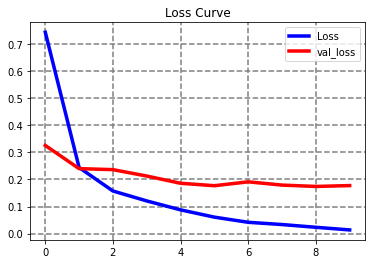

In [232]:
print('Train accuracy: {:.3}%'.format(metrics_train[1]*100))
print('  Val accuracy: {:.3}%'.format(metrics_val[1]*100))

print('Train Loss: {:.3}'.format(metrics_train[0]))
print('  Val Loss: {:.3}'.format(metrics_val[0]))

print(type(history.history))
print(history.history.keys())

# Plot Loss
plt.plot(history.history['loss'],  color='b', linewidth= 3.5)
plt.plot(history.history['val_loss'],color='r',linewidth= 3.5)
plt.grid(axis='both', color='gray', linewidth=1.5, linestyle='--')
plt.legend(['Loss', 'val_loss'])
plt.title('Loss Curve')

Text(0.5, 1.0, 'accuracy Curve')

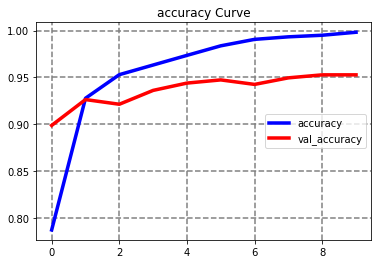

In [233]:
# Plot Acc
plt.plot(history.history['accuracy'],  color='b', linewidth= 3.5)
plt.plot(history.history['val_accuracy'],  color='r',linewidth= 3.5)
plt.grid(axis='both', color='gray', linewidth=1.5, linestyle='--')
plt.legend(['accuracy', 'val_accuracy'], loc=5)
plt.title('accuracy Curve')

In [234]:
# 2.6 - 
# Altere o tamanho do conjunto de treinamento para 55000  e veja se consegue obter uma acurácia de validação 
# de pelo menos 98% (em alguma época). A partir de agora, utilize quantas épocas desejar.
# Ao final do treinamento , sempre trace as curvas de perda e acurácia para os dois conjuntos.

In [235]:
# 2.6
tf.random.set_seed(100)
model = Sequential()
model.add(tf.keras.Input(shape=(28,28)))
model.add(Flatten())

# unit = 150, sigmoid = 99,83%

# camada 1
model.add(layers.Dense(units = 150, activation = 'sigmoid', name = 'camada1')) 

# camada de saída
model.add(layers.Dense(units = 10, activation = 'softmax', name = 'Saida')) 

model.summary()

# Otimizador
optimizer = tf.keras.optimizers.Adam(learning_rate =0.028,)
model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# Confirmando o shape
print('x_train.shape: {}'.format(x_train.shape))
print('y_train.shape: {}'.format(y_train.shape))

# Treinando o modelo
history = model.fit(x_train, y_train, epochs = 300, batch_size=256, validation_data=(x_val, y_val))

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_27 (Flatten)         (None, 784)               0         
_________________________________________________________________
camada1 (Dense)              (None, 150)               117750    
_________________________________________________________________
Saida (Dense)                (None, 10)                1510      
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________
x_train.shape: (55000, 28, 28)
y_train.shape: (55000,)
Epoch 1/300
215/215 [==============================] - 1s 3ms/step - loss: 0.3159 - accuracy: 0.9063 - val_loss: 0.1458 - val_accuracy: 0.9544
Epoch 2/300
215/215 [==============================] - 1s 3ms/step - loss: 0.1263 - accuracy: 0.9619 - val_loss: 0.1289 - val_accuracy: 0.9592
Epoch 3/300
215/215 [===============

Text(0.5, 1.0, 'Loss Curve')

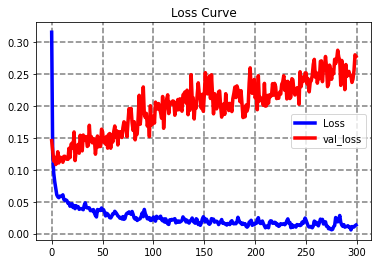

In [236]:
# Plot Loss
plt.plot(history.history['loss'],  color='b', linewidth= 3.5)
plt.plot(history.history['val_loss'],color='r',linewidth= 3.5)
plt.grid(axis='both', color='gray', linewidth=1.5, linestyle='--')
plt.legend(['Loss', 'val_loss'])
plt.title('Loss Curve')

Text(0.5, 1.0, 'accuracy Curve')

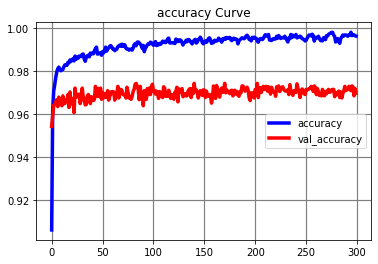

In [237]:
# Plot Acc
plt.plot(history.history['accuracy'],  color='b', linewidth= 3.5)
plt.plot(history.history['val_accuracy'],  color='r',linewidth= 3.5)
plt.grid(axis='both', color='gray', linewidth=1.2)
plt.legend(['accuracy', 'val_accuracy'], loc=5)
plt.title('accuracy Curve')

2.7 - > Mantenha os hiperparâmetros do modelo e altere apenas o tamanho do conjunto de treinamento. Trace um gráfico da acurácia de treinamento e da acurácia máxima de validação (para alguma época) em função do tamanho do conjunto de treinamento, por exemplo, em intervalos de 5 ou 10 mil amostras, até o máximo de 55000. Esta curva é conhecida em alguns contextos como curva de aprendizado (learning curve). Trace também o gráfico da época ótima em que foi obtida a máxima acurácia de validação, em função do tamanho do conjunto de treinamento. Que conclusões podem ser tiradas a partir desses resultados?

In [246]:
# 2.7
tf.random.set_seed(100)
model = Sequential()
model.add(tf.keras.Input(shape=(28,28)))
model.add(Flatten())

# unit = 150, sigmoid = 99,83%

# camada 1
model.add(layers.Dense(units = 150, activation = 'sigmoid', name = 'camada1')) 

# camada de saída
model.add(layers.Dense(units = 10, activation = 'softmax', name = 'Saida')) 

model.summary()

# Otimizador
optimizer = tf.keras.optimizers.Adam(learning_rate =0.028,)
model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_29 (Flatten)         (None, 784)               0         
_________________________________________________________________
camada1 (Dense)              (None, 150)               117750    
_________________________________________________________________
Saida (Dense)                (None, 10)                1510      
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________


In [248]:
%%time
# Confirmando o shape
print('x_train.shape: {}'.format(x_train.shape))
print('y_train.shape: {}'.format(y_train.shape))

list_size = [55000, 50000, 40000, 30000, 20000, 10000, 5000]
list_history = [0]*(len(list_size)-1)
list_epochs = [0]*(len(list_size)-1)

for index in range(len(list_size)+1):
    if index>1:
        
        #print(size, list_size[index-1]) 

        # A posição inicial do conjunto de treinamento
        start_size = list_size[index-1]

        # A posição final do conjunto de treinamento
        end_size = list_size[0]

        # separando o conjunto de treinamento
        x_train_size_var = x_train[start_size:end_size]
        y_train_size_var = y_train[start_size:end_size]

        # Confirmando o shape
        print('x_train.shape: {}'.format(x_train_size_var.shape))
        print('y_train.shape: {}'.format(y_train_size_var.shape))

        tf.random.set_seed(100)
        model = Sequential()
        model.add(tf.keras.Input(shape=(28,28)))
        model.add(Flatten())

        # unit = 150, sigmoid = 99,83%

        # camada 1
        model.add(layers.Dense(units = 150, activation = 'sigmoid', name = 'camada1')) 

        # camada de saída
        model.add(layers.Dense(units = 10, activation = 'softmax', name = 'Saida')) 

        # Otimizador
        optimizer = tf.keras.optimizers.Adam(learning_rate =0.028,)
        model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
        
        # Treinando o modelo
        history = model.fit(x_train_size_var, y_train_size_var, epochs = 300, batch_size=256, validation_data=(x_val, y_val))

        list_epochs[index-2] = np.argmax(history.history['val_accuracy'])
        list_history[index-2] = history.history


x_train.shape: (55000, 28, 28)
y_train.shape: (55000,)
x_train.shape: (5000, 28, 28)
y_train.shape: (5000,)
Epoch 1/300
20/20 [==============================] - 0s 10ms/step - loss: 1.2500 - accuracy: 0.6358 - val_loss: 0.4895 - val_accuracy: 0.8560
Epoch 2/300
20/20 [==============================] - 0s 5ms/step - loss: 0.3812 - accuracy: 0.8856 - val_loss: 0.3024 - val_accuracy: 0.9060
Epoch 3/300
20/20 [==============================] - 0s 5ms/step - loss: 0.2373 - accuracy: 0.9322 - val_loss: 0.2517 - val_accuracy: 0.9232
Epoch 4/300
20/20 [==============================] - 0s 5ms/step - loss: 0.1624 - accuracy: 0.9540 - val_loss: 0.2253 - val_accuracy: 0.9310
Epoch 5/300
20/20 [==============================] - 0s 5ms/step - loss: 0.1148 - accuracy: 0.9722 - val_loss: 0.2113 - val_accuracy: 0.9370
Epoch 6/300
20/20 [==============================] - 0s 5ms/step - loss: 0.0809 - accuracy: 0.9838 - val_loss: 0.2077 - val_accuracy: 0.9402
Epoch 7/300
20/20 [==========================

In [249]:
# index  end   start  diff
#   0   55000  50000  5000
#   1   55000  40000 15000
#   2   55000  30000 25000
#   3   55000  20000 35000
#   4   55000  10000 45000
#   5   55000  5000  50000

In [250]:
list_acc = [0]*len(list_epochs)
list_acc_val = [0]*len(list_epochs)
list_diff_size = [5000, 15000, 25000, 35000, 45000, 50000]

In [251]:
for i in range(len(list_epochs)):
    list_acc[i] = list_history[i]['accuracy'][list_epochs[i]]
    list_acc_val[i] = list_history[i]['val_accuracy'][list_epochs[i]]


Text(0.5, 1.0, 'Learning Curve')

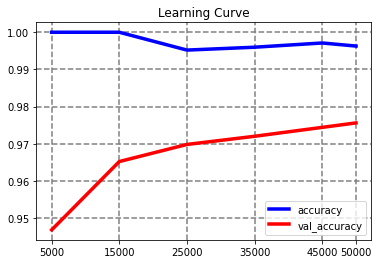

In [265]:
plt.plot(list_diff_size, list_acc, color='b',linewidth= 3.5)
plt.plot(list_diff_size, list_acc_val, color='r',linewidth= 3.5)
plt.xticks(list_diff_size)
plt.grid(axis='both', color='gray', linewidth=1.5, linestyle='--')
plt.legend(['accuracy', 'val_accuracy'], loc=0)
plt.title('Learning Curve')

Text(0.5, 1.0, 'Epochs Curve')

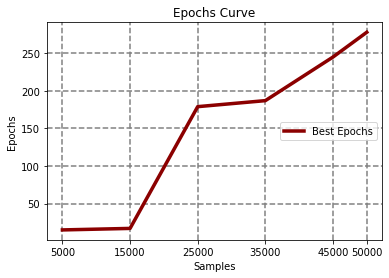

In [261]:
plt.plot(list_diff_size, list_epochs, color='darkred',linewidth= 3.5)
plt.xticks(list_diff_size)
plt.grid(axis='both', color='gray', linewidth=1.5, linestyle='--')
plt.legend(['Best Epochs',], loc=5)
plt.xlabel('Samples')
plt.ylabel('Epochs')
plt.title('Epochs Curve')

Foi possível observar que maior o numero de amostras, maior é a acuracia de validação. Já o numero de epochs com os melhores resultados para validação ficou maior cada vez mais que o numero de amostras aumentava


2.8 -> Finalmente, utilize todas as 60000 amostras para treinamento (e naturalmente não utilize conjunto de validação), com um número de épocas apropriadamente escolhido. Em seguida, meça o desempenho no conjunto de teste.

In [278]:
x_train_60mil.shape, y_train_60mil.shape

((60000, 28, 28), (60000,))

In [279]:
%%time
# 2.8
tf.random.set_seed(100)
model = Sequential()
model.add(tf.keras.Input(shape=(28,28)))
model.add(Flatten())

# unit = 150, sigmoid = 99,83%

# camada 1
model.add(layers.Dense(units = 150, activation = 'sigmoid', name = 'camada1')) 

# camada de saída
model.add(layers.Dense(units = 10, activation = 'softmax', name = 'Saida')) 

model.summary()

# Otimizador
optimizer = tf.keras.optimizers.Adam(learning_rate =0.028,)
model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinando o modelo
history = model.fit(x_train_60mil, y_train_60mil, epochs = 300, batch_size=256)


Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_37 (Flatten)         (None, 784)               0         
_________________________________________________________________
camada1 (Dense)              (None, 150)               117750    
_________________________________________________________________
Saida (Dense)                (None, 10)                1510      
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
235/235 [==============================] - 1s 2ms/step - loss: 0.2997 - accuracy: 0.9109
Epoch 2/300
235/235 [==============================] - 1s 2ms/step - loss: 0.1196 - accuracy: 0.9636
Epoch 3/300
235/235 [==============================] - 1s 2ms/step - loss: 0.0934 - accuracy: 0.9710
Epoch 4/300
235/235 [==============================] - 1s 2ms/step - loss:

In [280]:
acc_train = model.evaluate(x_train_60mil, y_train_60mil)[1]
acc_test = model.evaluate(x_test, y_test)[1]

print('Train accuracy: {:.2}%'.format(acc_train))
print(' Test accuracy: {:.2}%'.format(acc_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.2955 - accuracy: 0.9728
Train accuracy: 1.0%
 Test accuracy: 0.97%


Text(0.5, 1.0, 'Accuracy Curve')

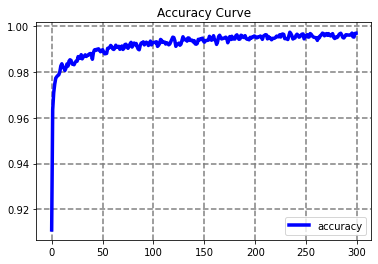

In [285]:
plt.plot(history.history['accuracy'], color='b',linewidth= 3.5)
plt.grid(axis='both', color='gray', linewidth=1.5, linestyle='--')
plt.legend(['accuracy'], loc=0)
plt.title('Accuracy Curve')

Text(0.5, 1.0, 'Loss Curve')

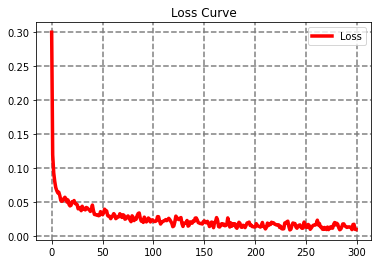

In [286]:
plt.plot(history.history['loss'], color='r',linewidth= 3.5)
plt.grid(axis='both', color='gray', linewidth=1.5, linestyle='--')
plt.legend(['Loss'], loc=0)
plt.title('Loss Curve')

2.9 - Para o modelo final que você desenvolveu, mostre alguns exemplos de predições erradas no conjunto de teste.

In [360]:
# Predict_classes
predict = model.predict_classes(x_test)

In [362]:
# Encontrando os index onde o predict ficou diferente do teste
index_err = np.where(predict!= y_test)
index_err

(array([  61,   92,  241,  247,  274,  290,  321,  340,  381,  445,  447,
         449,  578,  582,  583,  619,  655,  674,  707,  720,  740,  890,
         924,  938,  944,  947,  956, 1014, 1101, 1112, 1156, 1178, 1181,
        1182, 1226, 1232, 1242, 1247, 1289, 1299, 1315, 1319, 1328, 1331,
        1378, 1393, 1414, 1422, 1438, 1494, 1500, 1522, 1527, 1530, 1549,
        1553, 1554, 1581, 1611, 1621, 1626, 1640, 1681, 1709, 1717, 1782,
        1813, 1838, 1865, 1878, 1901, 1941, 1954, 1955, 1969, 1984, 2004,
        2018, 2024, 2029, 2043, 2053, 2093, 2098, 2109, 2135, 2162, 2182,
        2189, 2237, 2329, 2387, 2406, 2408, 2414, 2433, 2455, 2462, 2488,
        2573, 2598, 2607, 2648, 2654, 2863, 2877, 2921, 2927, 2939, 2953,
        2995, 2998, 3005, 3060, 3073, 3117, 3158, 3172, 3260, 3333, 3336,
        3344, 3381, 3405, 3422, 3441, 3475, 3490, 3503, 3520, 3549, 3558,
        3597, 3604, 3702, 3751, 3767, 3780, 3808, 3811, 3818, 3836, 3876,
        3893, 3906, 3941, 3951, 4027, 

In [367]:
# Pegando o argmax que é o index maximo
index_ok = np.argmax(np.where(predict == y_test))
index_ok

9727

In [382]:
# Alguns index do erro
erro = [61,   92,  241,  247,  274,  290,  321,  340,  381,  445,  447,
        449,  578,  582,  583,  619,  655,  674,  707,  720]

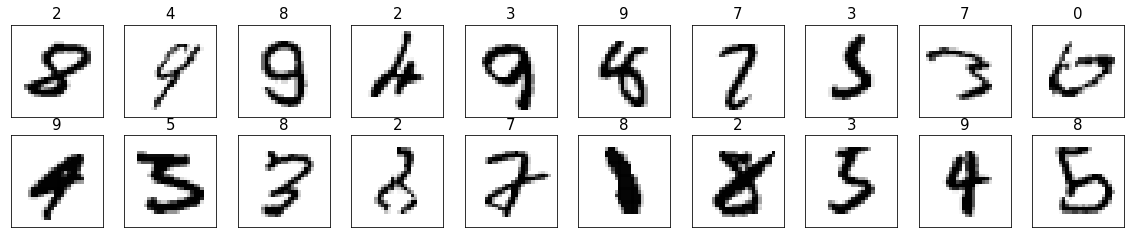

In [383]:
# Imagem -> Conjunto de teste
# Title -> Valor previsto errado
plt.figure(figsize=(20,20))
for i, value in enumerate(erro):
    plt.subplot(10,10,i+1)
    plt.imshow(x_test[value], cmap=plt.cm.gray_r);
    plt.xticks([]);
    plt.yticks([]);
    plt.title(predict[value], fontsize= 15);
    

2.10 Visualize como uma imagem os pesos da primeira camada oculta. Para isso, rode a célula abaixo:

In [384]:
W = model.weights[0].numpy()
vmax = np.abs(W).max()
@interact(i=(0,int(np.ceil(W.shape[1]/10))-1))
def _(i=0):
  plt.figure(figsize=(16,2.4));
  # para ver de 10 em 10
  for j in range(min(10, W.shape[1]-10*i)):
    plt.subplot(1,10,j+1)
    w = W[:,10*i+j].reshape(28,28)
    plt.imshow(w, cmap=plt.cm.bwr, vmin=-vmax, vmax=vmax); # (-,0,+) = (blue, white, red)
    plt.xticks([]);
    plt.yticks([]);

interactive(children=(IntSlider(value=0, description='i', max=14), Output()), _dom_classes=('widget-interact',…

11. Relate suas principais conclusões com este exercício.
1. (OPCIONAL) O que acontece se é aplicada uma permutação aleatória nos pixels de todas as imagens (a mesma permutação para todas as imagens)? O desempenho do modelo se altera? Você consegue identificar corretamente os dígitos? O que podemos concluir sobre o aprendizado do modelo?

#### Dicas
- Funções úteis: `plt.figure(figsize=(...))`, `plt.subplot()`, `plt.plot(..., label=...)`, `plt.xlabel()`, `plt.legend()`
- Quando usamos *early stopping*, perdemos parcialmente o controle sobre o número de épocas de treinamento como um hiperparâmetro. Nesse caso, após o desenvolvimento de um modelo, se desejarmos identificar seus hiperparâmetros, é conveniente registrar e fixar o número de épocas de treinamento efetivamente utilizadas e parar de utilizar *early stopping*.
- Se quiser salvar o melhor modelo encontrado, mas sem usar *early stopping*, você pode utilizar a *callback* `tf.keras.callbacks.ModelCheckpoint`. Alternativamente, você pode usar *early stopping* com uma paciência suficientemente grande (maior que o número de épocas).